# De-noising.....

In [13]:
from keras.models import load_model
import cv2
import numpy as np

In [14]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
# load images..........
from PIL import Image
import glob
images = []

for filename in glob.glob('validation//NORMAL//*.jpeg'): #all image .jpeg format
    #im=Image.open(filename)
    im = cv2.imread(filename)
    im = cv2.resize(im, (28,28))
    print(im)
    images.append(im)

for filename in glob.glob('validation//PNEUMONIA//*.jpeg'): #all image .jpeg format
    #im=Image.open(filename)
    im = cv2.imread(filename)
    im = cv2.resize(im, (28,28))
    print(im)
    images.append(im)

[[[32 32 32]
  [27 27 27]
  [28 28 28]
  ...
  [28 28 28]
  [30 30 30]
  [33 33 33]]

 [[30 30 30]
  [26 26 26]
  [23 23 23]
  ...
  [26 26 26]
  [28 28 28]
  [32 32 32]]

 [[29 29 29]
  [24 24 24]
  [18 18 18]
  ...
  [17 17 17]
  [20 20 20]
  [27 27 27]]

 ...

 [[29 29 29]
  [28 28 28]
  [23 23 23]
  ...
  [21 21 21]
  [28 28 28]
  [31 31 31]]

 [[29 29 29]
  [28 28 28]
  [24 24 24]
  ...
  [22 22 22]
  [32 32 32]
  [35 35 35]]

 [[30 30 30]
  [27 27 27]
  [26 26 26]
  ...
  [22 22 22]
  [32 32 32]
  [34 34 34]]]
[[[ 29  29  29]
  [125 125 125]
  [153 153 153]
  ...
  [165 165 165]
  [153 153 153]
  [120 120 120]]

 [[ 30  30  30]
  [109 109 109]
  [156 156 156]
  ...
  [175 175 175]
  [151 151 151]
  [122 122 122]]

 [[ 33  33  33]
  [ 93  93  93]
  [149 149 149]
  ...
  [171 171 171]
  [143 143 143]
  [100 100 100]]

 ...

 [[ 39  39  39]
  [ 41  41  41]
  [ 32  32  32]
  ...
  [ 25  25  25]
  [ 33  33  33]
  [ 35  35  35]]

 [[ 43  43  43]
  [ 41  41  41]
  [ 32  32  32]
  ...
  

[[[ 3  3  3]
  [ 5  5  5]
  [ 8  8  8]
  ...
  [ 8  8  8]
  [ 7  7  7]
  [ 7  7  7]]

 [[ 4  4  4]
  [ 5  5  5]
  [ 5  5  5]
  ...
  [ 6  6  6]
  [ 7  7  7]
  [ 9  9  9]]

 [[ 5  5  5]
  [ 3  3  3]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 5  5  5]
  [11 11 11]]

 ...

 [[ 2  2  2]
  [ 4  4  4]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 7  7  7]
  [ 5  5  5]]

 [[ 2  2  2]
  [ 4  4  4]
  [ 4  4  4]
  ...
  [ 2  2  2]
  [ 6  6  6]
  [ 6  6  6]]

 [[ 2  2  2]
  [ 3  3  3]
  [ 4  4  4]
  ...
  [ 3  3  3]
  [ 6  6  6]
  [ 4  4  4]]]
[[[  4   4   4]
  [  3   3   3]
  [  3   3   3]
  ...
  [  5   5   5]
  [  5   5   5]
  [  7   7   7]]

 [[  1   1   1]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  5   5   5]
  [  9   9   9]]

 [[ 26  26  26]
  [ 54  54  54]
  [ 77  77  77]
  ...
  [ 68  68  68]
  [ 35  35  35]
  [ 13  13  13]]

 ...

 [[  0   0   0]
  [ 99  99  99]
  [149 149 149]
  ...
  [114 114 114]
  [ 49  49  49]
  [ 10  10  10]]

 [[  1   1   1]
  [ 79  79  79]
  [127 127 127]
  ...
  

  [ 13  13  13]]]
[[[ 12  12  12]
  [ 12  12  12]
  [  7   7   7]
  ...
  [119 119 119]
  [ 96  96  96]
  [ 92  92  92]]

 [[ 10  10  10]
  [  3   3   3]
  [ 47  47  47]
  ...
  [137 137 137]
  [122 122 122]
  [143 143 143]]

 [[ 67  67  67]
  [ 97  97  97]
  [115 115 115]
  ...
  [135 135 135]
  [147 147 147]
  [174 174 174]]

 ...

 [[ 12  12  12]
  [  9   9   9]
  [ 74  74  74]
  ...
  [163 163 163]
  [ 55  55  55]
  [ 15  15  15]]

 [[ 12  12  12]
  [ 10  10  10]
  [ 60  60  60]
  ...
  [159 159 159]
  [ 50  50  50]
  [ 14  14  14]]

 [[ 11  11  11]
  [ 10  10  10]
  [ 41  41  41]
  ...
  [164 164 164]
  [ 49  49  49]
  [ 15  15  15]]]
[[[ 46  46  46]
  [ 84  84  84]
  [102 102 102]
  ...
  [107 107 107]
  [ 76  76  76]
  [ 45  45  45]]

 [[ 33  33  33]
  [ 79  79  79]
  [102 102 102]
  ...
  [108 108 108]
  [ 72  72  72]
  [ 36  36  36]]

 [[ 24  24  24]
  [ 75  75  75]
  [107 107 107]
  ...
  [104 104 104]
  [ 62  62  62]
  [  4   4   4]]

 ...

 [[ 17  17  17]
  [ 14  14  14]
  

  [  9   9   9]]]
[[[ 92  92  92]
  [137 137 137]
  [115 115 115]
  ...
  [ 81  81  81]
  [ 65  65  65]
  [100 100 100]]

 [[ 88  88  88]
  [ 98  98  98]
  [122 122 122]
  ...
  [ 76  76  76]
  [ 56  56  56]
  [ 89  89  89]]

 [[ 84  84  84]
  [ 94  94  94]
  [122 122 122]
  ...
  [ 70  70  70]
  [ 42  42  42]
  [ 76  76  76]]

 ...

 [[ 16  16  16]
  [ 14  14  14]
  [  0   0   0]
  ...
  [122 122 122]
  [ 52  52  52]
  [  5   5   5]]

 [[ 14  14  14]
  [  9   9   9]
  [ 60  60  60]
  ...
  [125 125 125]
  [ 62  62  62]
  [  0   0   0]]

 [[ 15  15  15]
  [ 10  10  10]
  [ 70  70  70]
  ...
  [155 155 155]
  [ 82  82  82]
  [  0   0   0]]]
[[[  0   0   0]
  [ 15  15  15]
  [ 81  81  81]
  ...
  [110 110 110]
  [ 72  72  72]
  [ 41  41  41]]

 [[  1   1   1]
  [ 12  12  12]
  [ 76  76  76]
  ...
  [117 117 117]
  [ 94  94  94]
  [ 36  36  36]]

 [[  0   0   0]
  [ 21  21  21]
  [ 75  75  75]
  ...
  [118 118 118]
  [ 85  85  85]
  [ 26  26  26]]

 ...

 [[ 41  41  41]
  [104 104 104]
  

[[[ 0  0  0]
  [37 37 37]
  [88 88 88]
  ...
  [45 45 45]
  [ 1  1  1]
  [12 12 12]]

 [[ 0  0  0]
  [28 28 28]
  [90 90 90]
  ...
  [44 44 44]
  [ 0  0  0]
  [12 12 12]]

 [[ 0  0  0]
  [22 22 22]
  [90 90 90]
  ...
  [42 42 42]
  [ 5  5  5]
  [14 14 14]]

 ...

 [[ 3  3  3]
  [ 1  1  1]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 3  3  3]
  [10 10 10]]

 [[ 5  5  5]
  [ 2  2  2]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 2  2  2]
  [10 10 10]]

 [[ 3  3  3]
  [ 7  7  7]
  [10 10 10]
  ...
  [ 0  0  0]
  [ 2  2  2]
  [ 8  8  8]]]
[[[132 132 132]
  [ 82  82  82]
  [ 83  83  83]
  ...
  [ 58  58  58]
  [137 137 137]
  [223 223 223]]

 [[113 113 113]
  [ 88  88  88]
  [ 66  66  66]
  ...
  [ 31  31  31]
  [170 170 170]
  [209 209 209]]

 [[120 120 120]
  [129 129 129]
  [106 106 106]
  ...
  [ 41  41  41]
  [200 200 200]
  [140 140 140]]

 ...

 [[ 21  21  21]
  [ 27  27  27]
  [ 21  21  21]
  ...
  [115 115 115]
  [  0   0   0]
  [ 12  12  12]]

 [[ 22  22  22]
  [ 26  26  26]
  [ 22  22  22]
  ...
  

  [ 0  0  0]]]
[[[ 0  0  0]
  [11 11 11]
  [28 28 28]
  ...
  [62 62 62]
  [42 42 42]
  [ 0  0  0]]

 [[ 0  0  0]
  [12 12 12]
  [17 17 17]
  ...
  [53 53 53]
  [34 34 34]
  [ 0  0  0]]

 [[ 0  0  0]
  [12 12 12]
  [ 9  9  9]
  ...
  [44 44 44]
  [27 27 27]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [12 12 12]
  [16 16 16]
  ...
  [12 12 12]
  [12 12 12]
  [ 0  0  0]]

 [[ 0  0  0]
  [11 11 11]
  [25 25 25]
  ...
  [12 12 12]
  [12 12 12]
  [ 0  0  0]]

 [[ 0  0  0]
  [11 11 11]
  [30 30 30]
  ...
  [11 11 11]
  [12 12 12]
  [ 0  0  0]]]
[[[ 0  0  0]
  [23 23 23]
  [21 21 21]
  ...
  [18 18 18]
  [18 18 18]
  [ 0  0  0]]

 [[ 0  0  0]
  [21 21 21]
  [20 20 20]
  ...
  [19 19 19]
  [18 18 18]
  [ 0  0  0]]

 [[ 0  0  0]
  [18 18 18]
  [17 17 17]
  ...
  [14 14 14]
  [15 15 15]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [17 17 17]
  [16 16 16]
  ...
  [15 15 15]
  [15 15 15]
  [ 0  0  0]]

 [[ 0  0  0]
  [17 17 17]
  [16 16 16]
  ...
  [15 15 15]
  [15 15 15]
  [ 0  0  0]]

 [[ 0  0  0]
  [17 17 17]
 

  [ 0  0  0]]]
[[[  0   0   0]
  [ 59  59  59]
  [ 66  66  66]
  ...
  [103 103 103]
  [ 70  70  70]
  [  0   0   0]]

 [[  0   0   0]
  [ 52  52  52]
  [ 64  64  64]
  ...
  [117 117 117]
  [ 75  75  75]
  [  0   0   0]]

 [[  0   0   0]
  [ 47  47  47]
  [ 69  69  69]
  ...
  [ 74  74  74]
  [ 71  71  71]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [ 31  31  31]
  [ 17  17  17]
  ...
  [ 26  26  26]
  [ 18  18  18]
  [  0   0   0]]

 [[  0   0   0]
  [ 30  30  30]
  [ 17  17  17]
  ...
  [ 18  18  18]
  [ 18  18  18]
  [  0   0   0]]

 [[  0   0   0]
  [ 31  31  31]
  [ 16  16  16]
  ...
  [ 18  18  18]
  [ 18  18  18]
  [  0   0   0]]]
[[[ 0  0  0]
  [14 14 14]
  [15 15 15]
  ...
  [18 18 18]
  [18 18 18]
  [ 0  0  0]]

 [[ 0  0  0]
  [48 48 48]
  [43 43 43]
  ...
  [16 16 16]
  [17 17 17]
  [ 0  0  0]]

 [[ 0  0  0]
  [96 96 96]
  [96 96 96]
  ...
  [28 28 28]
  [15 15 15]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [11 11 11]
  [93 93 93]
  ...
  [12 12 12]
  [17 17 17]
  [ 0  0  0]]

 [[ 0

[[[160 160 160]
  [137 137 137]
  [146 146 146]
  ...
  [137 137 137]
  [150 150 150]
  [201 201 201]]

 [[177 177 177]
  [253 253 253]
  [175 175 175]
  ...
  [160 160 160]
  [164 164 164]
  [207 207 207]]

 [[194 194 194]
  [174 174 174]
  [178 178 178]
  ...
  [170 170 170]
  [175 175 175]
  [202 202 202]]

 ...

 [[  0   0   0]
  [119 119 119]
  [201 201 201]
  ...
  [172 172 172]
  [ 89  89  89]
  [  0   0   0]]

 [[  0   0   0]
  [107 107 107]
  [200 200 200]
  ...
  [158 158 158]
  [ 62  62  62]
  [  0   0   0]]

 [[  0   0   0]
  [ 87  87  87]
  [198 198 198]
  ...
  [161 161 161]
  [ 29  29  29]
  [251 251 251]]]
[[[ 81  81  81]
  [118 118 118]
  [150 150 150]
  ...
  [101 101 101]
  [ 28  28  28]
  [  8   8   8]]

 [[ 76  76  76]
  [137 137 137]
  [140 140 140]
  ...
  [ 93  93  93]
  [ 25  25  25]
  [  0   0   0]]

 [[ 86  86  86]
  [141 141 141]
  [150 150 150]
  ...
  [ 86  86  86]
  [ 20  20  20]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [ 37  37  37]
  [159 159 159]
  ..

  [ 17  17  17]]]
[[[  0   0   0]
  [ 10  10  10]
  [ 95  95  95]
  ...
  [131 131 131]
  [108 108 108]
  [ 11  11  11]]

 [[  0   0   0]
  [  9   9   9]
  [ 84  84  84]
  ...
  [137 137 137]
  [ 99  99  99]
  [ 10  10  10]]

 [[  0   0   0]
  [  9   9   9]
  [ 70  70  70]
  ...
  [132 132 132]
  [ 77  77  77]
  [  8   8   8]]

 ...

 [[  0   0   0]
  [160 160 160]
  [147 147 147]
  ...
  [160 160 160]
  [ 34  34  34]
  [  0   0   0]]

 [[  0   0   0]
  [148 148 148]
  [176 176 176]
  ...
  [144 144 144]
  [ 37  37  37]
  [  1   1   1]]

 [[  0   0   0]
  [124 124 124]
  [162 162 162]
  ...
  [165 165 165]
  [ 33  33  33]
  [235 235 235]]]
[[[ 20  20  20]
  [ 47  47  47]
  [ 63  63  63]
  ...
  [104 104 104]
  [ 62  62  62]
  [ 23  23  23]]

 [[ 24  24  24]
  [ 81  81  81]
  [ 73  73  73]
  ...
  [ 60  60  60]
  [ 34  34  34]
  [ 17  17  17]]

 [[ 73  73  73]
  [ 92  92  92]
  [ 90  90  90]
  ...
  [ 56  56  56]
  [ 38  38  38]
  [ 17  17  17]]

 ...

 [[  0   0   0]
  [  0   0   0]
  

  [  0   0   0]]]
[[[ 54  54  54]
  [ 68  68  68]
  [ 67  67  67]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 98  98  98]
  [100 100 100]
  [ 95  95  95]
  ...
  [  5   5   5]
  [ 21  21  21]
  [ 26  26  26]]

 [[111 111 111]
  [146 146 146]
  [130 130 130]
  ...
  [ 66  66  66]
  [ 85  85  85]
  [ 84  84  84]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [125 125 125]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [154 154 154]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [147 147 147]
  [  0   0   0]
  [  0   0   0]]]
[[[ 77  77  77]
  [139 139 139]
  [148 148 148]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 75  75  75]
  [112 112 112]
  [154 154 154]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 81  81  81]
  [105 105 105]
  [145 145 145]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  

[[[ 45  45  45]
  [  2   2   2]
  [147 147 147]
  ...
  [153 153 153]
  [154 154 154]
  [ 95  95  95]]

 [[ 52  52  52]
  [ 99  99  99]
  [164 164 164]
  ...
  [149 149 149]
  [156 156 156]
  [ 95  95  95]]

 [[ 56  56  56]
  [ 98  98  98]
  [157 157 157]
  ...
  [144 144 144]
  [120 120 120]
  [ 92  92  92]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
[[[ 33  33  33]
  [ 30  30  30]
  [  9   9   9]
  ...
  [111 111 111]
  [102 102 102]
  [175 175 175]]

 [[ 88  88  88]
  [ 81  81  81]
  [ 67  67  67]
  ...
  [162 162 162]
  [139 139 139]
  [198 198 198]]

 [[107 107 107]
  [101 101 101]
  [ 90  90  90]
  ...
  [180 180 180]
  [150 150 150]
  [190 190 190]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[  0   0   0]
  [  9   9   9]
  [ 99  99  99]
  ...
  [131 131 131]
  [126 126 126]
  [ 98  98  98]]

 [[255 255 255]
  [  0   0   0]
  [ 86  86  86]
  ...
  [132 132 132]
  [133 133 133]
  [ 89  89  89]]

 [[  0   0   0]
  [  0   0   0]
  [ 72  72  72]
  ...
  [142 142 142]
  [140 140 140]
  [105 105 105]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [144 144 144]
  ...
  [ 33  33  33]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [ 15  15  15]
  [ 94  94  94]
  ...
  [ 25  25  25]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [ 15  15  15]
  [112 112 112]
  ...
  [ 32  32  32]
  [  0   0   0]
  [  0   0   0]]]
[[[125 125 125]
  [ 90  90  90]
  [ 90  90  90]
  ...
  [131 131 131]
  [137 137 137]
  [ 55  55  55]]

 [[135 135 135]
  [ 81  81  81]
  [122 122 122]
  ...
  [101 101 101]
  [ 82  82  82]
  [ 60  60  60]]

 [[133 133 133]
  [ 89  89  89]
  [103 103 103]
  ...
  [100 100 100]
  [ 88  88  88]
  [ 51  51  51]]

 ...

 [[  0   0   0]
  [ 17  17  17]
  [ 67  67  67]
  ..

  [ 0  0  0]]]
[[[ 68  68  68]
  [ 58  58  58]
  [ 52  52  52]
  ...
  [ 78  78  78]
  [101 101 101]
  [107 107 107]]

 [[ 76  76  76]
  [ 72  72  72]
  [ 71  71  71]
  ...
  [102 102 102]
  [113 113 113]
  [119 119 119]]

 [[101 101 101]
  [ 92  92  92]
  [ 88  88  88]
  ...
  [126 126 126]
  [121 121 121]
  [108 108 108]]

 ...

 [[  0   0   0]
  [ 22  22  22]
  [ 75  75  75]
  ...
  [110 110 110]
  [105 105 105]
  [  0   0   0]]

 [[  0   0   0]
  [ 17  17  17]
  [110 110 110]
  ...
  [117 117 117]
  [ 98  98  98]
  [  0   0   0]]

 [[  0   0   0]
  [ 31  31  31]
  [131 131 131]
  ...
  [135 135 135]
  [127 127 127]
  [  0   0   0]]]
[[[111 111 111]
  [109 109 109]
  [135 135 135]
  ...
  [ 70  70  70]
  [ 82  82  82]
  [ 87  87  87]]

 [[ 73  73  73]
  [124 124 124]
  [153 153 153]
  ...
  [ 89  89  89]
  [ 94  94  94]
  [ 96  96  96]]

 [[ 79  79  79]
  [ 96  96  96]
  [151 151 151]
  ...
  [114 114 114]
  [ 88  88  88]
  [ 98  98  98]]

 ...

 [[ 14  14  14]
  [104 104 104]
  [ 4

[[[ 95  95  95]
  [171 171 171]
  [156 156 156]
  ...
  [134 134 134]
  [135 135 135]
  [140 140 140]]

 [[101 101 101]
  [133 133 133]
  [158 158 158]
  ...
  [153 153 153]
  [130 130 130]
  [145 145 145]]

 [[ 92  92  92]
  [123 123 123]
  [147 147 147]
  ...
  [155 155 155]
  [115 115 115]
  [137 137 137]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [ 89  89  89]
  ...
  [ 40  40  40]
  [132 132 132]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 90  90  90]
  ...
  [134 134 134]
  [115 115 115]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 91  91  91]
  ...
  [154 154 154]
  [147 147 147]
  [  0   0   0]]]
[[[ 16  16  16]
  [ 71  71  71]
  [118 118 118]
  ...
  [170 170 170]
  [105 105 105]
  [ 82  82  82]]

 [[  6   6   6]
  [ 48  48  48]
  [108 108 108]
  ...
  [108 108 108]
  [100 100 100]
  [ 69  69  69]]

 [[  0   0   0]
  [ 27  27  27]
  [ 99  99  99]
  ...
  [110 110 110]
  [105 105 105]
  [ 52  52  52]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[211 211 211]
  [187 187 187]
  [ 10  10  10]
  ...
  [201 201 201]
  [205 205 205]
  [216 216 216]]

 [[211 211 211]
  [209 209 209]
  [ 86  86  86]
  ...
  [202 202 202]
  [208 208 208]
  [218 218 218]]

 [[191 191 191]
  [210 210 210]
  [ 18  18  18]
  ...
  [204 204 204]
  [212 212 212]
  [216 216 216]]

 ...

 [[ 17  17  17]
  [ 16  16  16]
  [ 15  15  15]
  ...
  [ 14  14  14]
  [ 15  15  15]
  [ 16  16  16]]

 [[ 19  19  19]
  [ 17  17  17]
  [ 15  15  15]
  ...
  [ 14  14  14]
  [ 15  15  15]
  [ 16  16  16]]

 [[ 23  23  23]
  [ 18  18  18]
  [ 16  16  16]
  ...
  [ 14  14  14]
  [ 15  15  15]
  [ 17  17  17]]]
[[[ 47  47  47]
  [ 60  60  60]
  [102 102 102]
  ...
  [ 59  59  59]
  [ 82  82  82]
  [ 94  94  94]]

 [[ 53  53  53]
  [ 93  93  93]
  [ 88  88  88]
  ...
  [ 67  67  67]
  [ 98  98  98]
  [ 79  79  79]]

 [[175 175 175]
  [103 103 103]
  [ 51  51  51]
  ...
  [ 88  88  88]
  [114 114 114]
  [ 83  83  83]]

 ...

 [[ 19  19  19]
  [ 90  90  90]
  [144 144 144]
  ..

[[[ 37  37  37]
  [ 51  51  51]
  [ 22  22  22]
  ...
  [200 200 200]
  [217 217 217]
  [222 222 222]]

 [[ 17  17  17]
  [ 15  15  15]
  [ 38  38  38]
  ...
  [195 195 195]
  [210 210 210]
  [225 225 225]]

 [[  6   6   6]
  [ 34  34  34]
  [ 41  41  41]
  ...
  [190 190 190]
  [208 208 208]
  [224 224 224]]

 ...

 [[ 23  23  23]
  [ 20  20  20]
  [ 12  12  12]
  ...
  [ 22  22  22]
  [ 18  18  18]
  [ 48  48  48]]

 [[ 52  52  52]
  [ 19  19  19]
  [ 26  26  26]
  ...
  [ 21  21  21]
  [ 41  41  41]
  [ 20  20  20]]

 [[ 12  12  12]
  [ 18  18  18]
  [ 48  48  48]
  ...
  [ 19  19  19]
  [ 40  40  40]
  [ 20  20  20]]]
[[[ 45  45  45]
  [ 84  84  84]
  [110 110 110]
  ...
  [ 63  63  63]
  [ 58  58  58]
  [ 68  68  68]]

 [[ 51  51  51]
  [102 102 102]
  [110 110 110]
  ...
  [ 92  92  92]
  [ 61  61  61]
  [ 66  66  66]]

 [[ 70  70  70]
  [109 109 109]
  [118 118 118]
  ...
  [102 102 102]
  [ 87  87  87]
  [ 80  80  80]]

 ...

 [[ 47  47  47]
  [ 61  61  61]
  [118 118 118]
  ..

[[[ 11  11  11]
  [ 32  32  32]
  [ 46  46  46]
  ...
  [ 27  27  27]
  [ 26  26  26]
  [ 17  17  17]]

 [[ 22  22  22]
  [ 47  47  47]
  [255 255 255]
  ...
  [ 40  40  40]
  [ 33  33  33]
  [ 25  25  25]]

 [[ 27  27  27]
  [ 50  50  50]
  [ 56  56  56]
  ...
  [ 54  54  54]
  [ 51  51  51]
  [ 40  40  40]]

 ...

 [[ 15  15  15]
  [ 48  48  48]
  [ 95  95  95]
  ...
  [ 76  76  76]
  [ 48  48  48]
  [ 23  23  23]]

 [[ 13  13  13]
  [ 49  49  49]
  [ 73  73  73]
  ...
  [ 85  85  85]
  [ 45  45  45]
  [ 14  14  14]]

 [[ 13  13  13]
  [ 54  54  54]
  [ 90  90  90]
  ...
  [ 85  85  85]
  [ 46  46  46]
  [  0   0   0]]]
[[[ 18  18  18]
  [ 27  27  27]
  [ 43  43  43]
  ...
  [ 46  46  46]
  [ 56  56  56]
  [183 183 183]]

 [[ 26  26  26]
  [ 50  50  50]
  [ 60  60  60]
  ...
  [ 80  80  80]
  [ 69  69  69]
  [145 145 145]]

 [[ 47  47  47]
  [ 58  58  58]
  [ 77  77  77]
  ...
  [108 108 108]
  [ 83  83  83]
  [105 105 105]]

 ...

 [[ 24  24  24]
  [ 19  19  19]
  [ 49  49  49]
  ..

[[[ 61  61  61]
  [ 79  79  79]
  [ 81  81  81]
  ...
  [120 120 120]
  [105 105 105]
  [ 88  88  88]]

 [[ 97  97  97]
  [ 91  91  91]
  [108 108 108]
  ...
  [114 114 114]
  [114 114 114]
  [ 83  83  83]]

 [[116 116 116]
  [ 98  98  98]
  [124 124 124]
  ...
  [123 123 123]
  [120 120 120]
  [ 99  99  99]]

 ...

 [[ 39  39  39]
  [102 102 102]
  [166 166 166]
  ...
  [ 77  77  77]
  [ 40  40  40]
  [ 41  41  41]]

 [[ 38  38  38]
  [107 107 107]
  [151 151 151]
  ...
  [ 77  77  77]
  [ 40  40  40]
  [ 42  42  42]]

 [[ 38  38  38]
  [113 113 113]
  [154 154 154]
  ...
  [ 76  76  76]
  [ 40  40  40]
  [ 42  42  42]]]
[[[172 172 172]
  [ 69  69  69]
  [ 34  34  34]
  ...
  [ 43  43  43]
  [ 34  34  34]
  [ 54  54  54]]

 [[166 166 166]
  [ 62  62  62]
  [253 253 253]
  ...
  [ 47  47  47]
  [ 42  42  42]
  [ 57  57  57]]

 [[169 169 169]
  [ 63  63  63]
  [ 32  32  32]
  ...
  [ 49  49  49]
  [ 47  47  47]
  [ 64  64  64]]

 ...

 [[ 25  25  25]
  [ 19  19  19]
  [ 48  48  48]
  ..

[[[168 168 168]
  [112 112 112]
  [ 32  32  32]
  ...
  [ 25  25  25]
  [ 23  23  23]
  [ 31  31  31]]

 [[160 160 160]
  [106 106 106]
  [ 53  53  53]
  ...
  [ 25  25  25]
  [ 20  20  20]
  [ 18  18  18]]

 [[156 156 156]
  [ 99  99  99]
  [ 57  57  57]
  ...
  [ 50  50  50]
  [ 47  47  47]
  [190 190 190]]

 ...

 [[  3   3   3]
  [ 90  90  90]
  [125 125 125]
  ...
  [101 101 101]
  [  1   1   1]
  [ 38  38  38]]

 [[ 36  36  36]
  [ 88  88  88]
  [134 134 134]
  ...
  [ 92  92  92]
  [ 10  10  10]
  [ 17  17  17]]

 [[ 44  44  44]
  [ 89  89  89]
  [126 126 126]
  ...
  [104 104 104]
  [ 13  13  13]
  [ 17  17  17]]]
[[[ 39  39  39]
  [ 47  47  47]
  [ 41  41  41]
  ...
  [ 55  55  55]
  [ 52  52  52]
  [ 50  50  50]]

 [[ 44  44  44]
  [ 55  55  55]
  [167 167 167]
  ...
  [ 58  58  58]
  [ 56  56  56]
  [ 49  49  49]]

 [[ 58  58  58]
  [ 65  65  65]
  [ 57  57  57]
  ...
  [ 56  56  56]
  [ 79  79  79]
  [ 70  70  70]]

 ...

 [[ 23  23  23]
  [ 19  19  19]
  [ 78  78  78]
  ..

[[[ 50  50  50]
  [ 91  91  91]
  [112 112 112]
  ...
  [108 108 108]
  [109 109 109]
  [ 53  53  53]]

 [[ 52  52  52]
  [ 66  66  66]
  [120 120 120]
  ...
  [114 114 114]
  [ 65  65  65]
  [ 46  46  46]]

 [[ 44  44  44]
  [ 63  63  63]
  [123 123 123]
  ...
  [ 71  71  71]
  [ 70  70  70]
  [ 42  42  42]]

 ...

 [[  0   0   0]
  [ 33  33  33]
  [ 66  66  66]
  ...
  [ 68  68  68]
  [ 51  51  51]
  [  0   0   0]]

 [[  0   0   0]
  [ 35  35  35]
  [ 57  57  57]
  ...
  [115 115 115]
  [ 71  71  71]
  [  0   0   0]]

 [[  0   0   0]
  [ 48  48  48]
  [102 102 102]
  ...
  [117 117 117]
  [ 74  74  74]
  [  0   0   0]]]
[[[ 55  55  55]
  [ 57  57  57]
  [ 60  60  60]
  ...
  [ 14  14  14]
  [ 29  29  29]
  [ 32  32  32]]

 [[ 85  85  85]
  [ 91  91  91]
  [ 91  91  91]
  ...
  [ 24  24  24]
  [ 34  34  34]
  [ 25  25  25]]

 [[ 78  78  78]
  [ 84  84  84]
  [ 91  91  91]
  ...
  [ 39  39  39]
  [ 41  41  41]
  [ 41  41  41]]

 ...

 [[ 25  25  25]
  [ 40  40  40]
  [141 141 141]
  ..

[[[ 84  84  84]
  [ 39  39  39]
  [ 35  35  35]
  ...
  [ 26  26  26]
  [ 27  27  27]
  [ 23  23  23]]

 [[ 36  36  36]
  [ 41  41  41]
  [200 200 200]
  ...
  [ 22  22  22]
  [154 154 154]
  [ 17  17  17]]

 [[ 37  37  37]
  [ 50  50  50]
  [ 50  50  50]
  ...
  [156 156 156]
  [ 99  99  99]
  [ 45  45  45]]

 ...

 [[ 27  27  27]
  [ 18  18  18]
  [ 80  80  80]
  ...
  [141 141 141]
  [ 50  50  50]
  [217 217 217]]

 [[ 27  27  27]
  [ 19  19  19]
  [ 79  79  79]
  ...
  [172 172 172]
  [ 38  38  38]
  [217 217 217]]

 [[ 27  27  27]
  [ 17  17  17]
  [100 100 100]
  ...
  [ 77  77  77]
  [ 38  38  38]
  [210 210 210]]]
[[[ 12  12  12]
  [ 13  13  13]
  [ 31  31  31]
  ...
  [184 184 184]
  [215 215 215]
  [216 216 216]]

 [[ 41  41  41]
  [ 42  42  42]
  [ 46  46  46]
  ...
  [ 27  27  27]
  [174 174 174]
  [208 208 208]]

 [[ 44  44  44]
  [ 59  59  59]
  [ 58  58  58]
  ...
  [ 23  23  23]
  [159 159 159]
  [207 207 207]]

 ...

 [[157 157 157]
  [211 211 211]
  [ 20  20  20]
  ..

[[[ 49  49  49]
  [115 115 115]
  [157 157 157]
  ...
  [111 111 111]
  [ 90  90  90]
  [ 50  50  50]]

 [[ 45  45  45]
  [105 105 105]
  [145 145 145]
  ...
  [120 120 120]
  [ 77  77  77]
  [ 33  33  33]]

 [[ 33  33  33]
  [ 98  98  98]
  [125 125 125]
  ...
  [116 116 116]
  [ 70  70  70]
  [ 17  17  17]]

 ...

 [[  0   0   0]
  [ 78  78  78]
  [159 159 159]
  ...
  [167 167 167]
  [ 36  36  36]
  [  4   4   4]]

 [[  1   1   1]
  [ 89  89  89]
  [132 132 132]
  ...
  [110 110 110]
  [ 42  42  42]
  [  4   4   4]]

 [[  4   4   4]
  [ 95  95  95]
  [164 164 164]
  ...
  [140 140 140]
  [ 48  48  48]
  [  4   4   4]]]
[[[ 47  47  47]
  [ 54  54  54]
  [227 227 227]
  ...
  [ 32  32  32]
  [ 31  31  31]
  [ 28  28  28]]

 [[ 46  46  46]
  [ 51  51  51]
  [255 255 255]
  ...
  [ 43  43  43]
  [ 38  38  38]
  [ 36  36  36]]

 [[ 58  58  58]
  [ 65  65  65]
  [ 59  59  59]
  ...
  [ 49  49  49]
  [ 41  41  41]
  [ 50  50  50]]

 ...

 [[ 26  26  26]
  [ 65  65  65]
  [ 62  62  62]
  ..

[[[ 33  33  33]
  [ 92  92  92]
  [117 117 117]
  ...
  [  0   0   0]
  [  0   0   0]
  [  8   8   8]]

 [[ 34  34  34]
  [ 79  79  79]
  [104 104 104]
  ...
  [  0   0   0]
  [  0   0   0]
  [  5   5   5]]

 [[ 21  21  21]
  [254 254 254]
  [ 87  87  87]
  ...
  [  0   0   0]
  [  3   3   3]
  [  5   5   5]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [156 156 156]
  [ 39  39  39]
  [  1   1   1]]

 [[  0   0   0]
  [  1   1   1]
  [  1   1   1]
  ...
  [154 154 154]
  [ 37  37  37]
  [  1   1   1]]

 [[  8   8   8]
  [ 23  23  23]
  [ 16  16  16]
  ...
  [148 148 148]
  [ 33  33  33]
  [  1   1   1]]]
[[[105 105 105]
  [159 159 159]
  [167 167 167]
  ...
  [ 24  24  24]
  [ 33  33  33]
  [169 169 169]]

 [[ 96  96  96]
  [132 132 132]
  [162 162 162]
  ...
  [ 73  73  73]
  [101 101 101]
  [131 131 131]]

 [[ 83  83  83]
  [125 125 125]
  [139 139 139]
  ...
  [154 154 154]
  [141 141 141]
  [158 158 158]]

 ...

 [[ 18  18  18]
  [148 148 148]
  [171 171 171]
  ..

[[[25 25 25]
  [43 43 43]
  [36 36 36]
  ...
  [27 27 27]
  [18 18 18]
  [ 0  0  0]]

 [[30 30 30]
  [35 35 35]
  [54 54 54]
  ...
  [35 35 35]
  [23 23 23]
  [ 0  0  0]]

 [[61 61 61]
  [53 53 53]
  [60 60 60]
  ...
  [36 36 36]
  [28 28 28]
  [11 11 11]]

 ...

 [[10 10 10]
  [ 7  7  7]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 3  3  3]
  [ 5  5  5]]

 [[10 10 10]
  [ 7  7  7]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 2  2  2]
  [ 6  6  6]]

 [[10 10 10]
  [ 7  7  7]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 3  3  3]
  [ 6  6  6]]]
[[[159 159 159]
  [163 163 163]
  [ 79  79  79]
  ...
  [ 14  14  14]
  [ 11  11  11]
  [ 34  34  34]]

 [[141 141 141]
  [178 178 178]
  [116 116 116]
  ...
  [  7   7   7]
  [ 11  11  11]
  [ 22  22  22]]

 [[159 159 159]
  [161 161 161]
  [143 143 143]
  ...
  [  1   1   1]
  [  0   0   0]
  [ 45  45  45]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 19  19  19]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  

[[[  3   3   3]
  [ 32  32  32]
  [ 80  80  80]
  ...
  [ 98  98  98]
  [ 36  36  36]
  [ 14  14  14]]

 [[  2   2   2]
  [ 32  32  32]
  [ 58  58  58]
  ...
  [ 79  79  79]
  [ 38  38  38]
  [  5   5   5]]

 [[  0   0   0]
  [ 26  26  26]
  [ 55  55  55]
  ...
  [ 51  51  51]
  [ 24  24  24]
  [  4   4   4]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [ 36  36  36]
  ...
  [144 144 144]
  [  5   5   5]
  [  0   0   0]]

 [[  5   5   5]
  [ 15  15  15]
  [ 59  59  59]
  ...
  [126 126 126]
  [  9   9   9]
  [  0   0   0]]

 [[  1   1   1]
  [  6   6   6]
  [ 59  59  59]
  ...
  [141 141 141]
  [ 14  14  14]
  [  0   0   0]]]
[[[ 16  16  16]
  [ 43  43  43]
  [143 143 143]
  ...
  [ 55  55  55]
  [ 17  17  17]
  [  2   2   2]]

 [[  8   8   8]
  [ 36  36  36]
  [ 71  71  71]
  ...
  [ 54  54  54]
  [  7   7   7]
  [170 170 170]]

 [[  5   5   5]
  [242 242 242]
  [ 62  62  62]
  ...
  [ 46  46  46]
  [ 12  12  12]
  [128 128 128]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[ 90  90  90]
  [ 79  79  79]
  [ 93  93  93]
  ...
  [ 72  72  72]
  [ 75  75  75]
  [ 65  65  65]]

 [[109 109 109]
  [ 84  84  84]
  [ 93  93  93]
  ...
  [101 101 101]
  [101 101 101]
  [ 52  52  52]]

 [[ 58  58  58]
  [ 19  19  19]
  [ 99  99  99]
  ...
  [124 124 124]
  [112 112 112]
  [ 84  84  84]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 36  36  36]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  1   1   1]
  ...
  [ 52  52  52]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  3   3   3]
  ...
  [ 72  72  72]
  [  0   0   0]
  [  0   0   0]]]
[[[ 27  27  27]
  [123 123 123]
  [ 49  49  49]
  ...
  [ 53  53  53]
  [ 62  62  62]
  [ 47  47  47]]

 [[ 32  32  32]
  [ 49  49  49]
  [ 56  56  56]
  ...
  [ 60  60  60]
  [ 50  50  50]
  [ 27  27  27]]

 [[ 41  41  41]
  [ 68  68  68]
  [ 72  72  72]
  ...
  [ 87  87  87]
  [ 72  72  72]
  [ 34  34  34]]

 ...

 [[  5   5   5]
  [  0   0   0]
  [ 64  64  64]
  ..

[[[ 80  80  80]
  [127 127 127]
  [161 161 161]
  ...
  [167 167 167]
  [ 96  96  96]
  [105 105 105]]

 [[ 79  79  79]
  [154 154 154]
  [169 169 169]
  ...
  [160 160 160]
  [ 92  92  92]
  [ 11  11  11]]

 [[ 73  73  73]
  [163 163 163]
  [163 163 163]
  ...
  [164 164 164]
  [ 92  92  92]
  [ 11  11  11]]

 ...

 [[  0   0   0]
  [ 80  80  80]
  [162 162 162]
  ...
  [176 176 176]
  [ 57  57  57]
  [  0   0   0]]

 [[  0   0   0]
  [ 93  93  93]
  [170 170 170]
  ...
  [154 154 154]
  [ 72  72  72]
  [  0   0   0]]

 [[ 25  25  25]
  [110 110 110]
  [151 151 151]
  ...
  [160 160 160]
  [ 94  94  94]
  [  0   0   0]]]
[[[  2   2   2]
  [ 16  16  16]
  [ 74  74  74]
  ...
  [ 16  16  16]
  [  0   0   0]
  [  0   0   0]]

 [[  2   2   2]
  [ 13  13  13]
  [ 62  62  62]
  ...
  [ 16  16  16]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [ 11  11  11]
  [ 40  40  40]
  ...
  [  9   9   9]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [ 29  29  29]
  [131 131 131]
  ..

[[[ 34  34  34]
  [ 79  79  79]
  [ 81  81  81]
  ...
  [ 68  68  68]
  [ 50  50  50]
  [ 51  51  51]]

 [[ 80  80  80]
  [ 83  83  83]
  [ 96  96  96]
  ...
  [ 67  67  67]
  [ 85  85  85]
  [ 62  62  62]]

 [[ 68  68  68]
  [ 82  82  82]
  [105 105 105]
  ...
  [ 68  68  68]
  [ 97  97  97]
  [ 73  73  73]]

 ...

 [[  0   0   0]
  [  1   1   1]
  [117 117 117]
  ...
  [ 68  68  68]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  3   3   3]
  [142 142 142]
  ...
  [106 106 106]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  5   5   5]
  [116 116 116]
  ...
  [121 121 121]
  [  0   0   0]
  [  0   0   0]]]
[[[132 132 132]
  [145 145 145]
  [154 154 154]
  ...
  [248 248 248]
  [116 116 116]
  [ 86  86  86]]

 [[169 169 169]
  [173 173 173]
  [164 164 164]
  ...
  [126 126 126]
  [102 102 102]
  [ 62  62  62]]

 [[169 169 169]
  [180 180 180]
  [179 179 179]
  ...
  [112 112 112]
  [ 53  53  53]
  [ 24  24  24]]

 ...

 [[  2   2   2]
  [ 53  53  53]
  [168 168 168]
  ..

  [  0   0   0]]]
[[[ 33  33  33]
  [ 58  58  58]
  [106 106 106]
  ...
  [ 79  79  79]
  [122 122 122]
  [116 116 116]]

 [[ 28  28  28]
  [ 58  58  58]
  [115 115 115]
  ...
  [141 141 141]
  [110 110 110]
  [ 70  70  70]]

 [[ 33  33  33]
  [ 56  56  56]
  [ 88  88  88]
  ...
  [134 134 134]
  [129 129 129]
  [248 248 248]]

 ...

 [[  0   0   0]
  [110 110 110]
  [163 163 163]
  ...
  [161 161 161]
  [ 12  12  12]
  [  0   0   0]]

 [[  1   1   1]
  [104 104 104]
  [155 155 155]
  ...
  [129 129 129]
  [ 11  11  11]
  [  0   0   0]]

 [[  1   1   1]
  [ 77  77  77]
  [135 135 135]
  ...
  [165 165 165]
  [ 10  10  10]
  [  0   0   0]]]
[[[ 17  17  17]
  [ 44  44  44]
  [ 58  58  58]
  ...
  [145 145 145]
  [ 61  61  61]
  [ 35  35  35]]

 [[  8   8   8]
  [ 40  40  40]
  [ 79  79  79]
  ...
  [114 114 114]
  [ 64  64  64]
  [ 25  25  25]]

 [[  5   5   5]
  [ 46  46  46]
  [107 107 107]
  ...
  [ 90  90  90]
  [ 63  63  63]
  [ 23  23  23]]

 ...

 [[  0   0   0]
  [  0   0   0]
  

[[[133 133 133]
  [143 143 143]
  [135 135 135]
  ...
  [ 83  83  83]
  [100 100 100]
  [ 96  96  96]]

 [[140 140 140]
  [ 60  60  60]
  [135 135 135]
  ...
  [104 104 104]
  [124 124 124]
  [111 111 111]]

 [[157 157 157]
  [146 146 146]
  [145 145 145]
  ...
  [122 122 122]
  [129 129 129]
  [122 122 122]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [ 28  28  28]
  ...
  [127 127 127]
  [  8   8   8]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 32  32  32]
  ...
  [121 121 121]
  [  9   9   9]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 36  36  36]
  ...
  [128 128 128]
  [ 13  13  13]
  [  0   0   0]]]
[[[ 43  43  43]
  [ 78  78  78]
  [138 138 138]
  ...
  [ 85  85  85]
  [214 214 214]
  [  5   5   5]]

 [[ 37  37  37]
  [ 76  76  76]
  [133 133 133]
  ...
  [114 114 114]
  [ 76  76  76]
  [ 13  13  13]]

 [[ 29  29  29]
  [ 80  80  80]
  [129 129 129]
  ...
  [101 101 101]
  [ 63  63  63]
  [  1   1   1]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [ 99  99  99]
  ..

[[[ 38  38  38]
  [ 64  64  64]
  [135 135 135]
  ...
  [ 11  11  11]
  [  0   0   0]
  [  0   0   0]]

 [[ 32  32  32]
  [ 69  69  69]
  [128 128 128]
  ...
  [ 14  14  14]
  [  0   0   0]
  [  0   0   0]]

 [[ 31  31  31]
  [ 66  66  66]
  [119 119 119]
  ...
  [ 15  15  15]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  1   1   1]
  [ 54  54  54]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 52  52  52]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 44  44  44]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
[[[ 8  8  8]
  [ 1  1  1]
  [82 82 82]
  ...
  [ 6  6  6]
  [ 8  8  8]
  [ 8  8  8]]

 [[ 7  7  7]
  [ 1  1  1]
  [78 78 78]
  ...
  [ 3  3  3]
  [10 10 10]
  [ 8  8  8]]

 [[ 8  8  8]
  [ 0  0  0]
  [82 82 82]
  ...
  [ 3  3  3]
  [ 8  8  8]
  [ 9  9  9]]

 ...

 [[ 9  9  9]
  [ 2  2  2]
  [42 42 42]
  ...
  [ 2  2  2]
  [ 7  7  7]
  [ 7  7  7]]

 [[11 11 11]
  [ 4  

[[[ 97  97  97]
  [ 61  61  61]
  [ 35  35  35]
  ...
  [ 44  44  44]
  [122 122 122]
  [197 197 197]]

 [[ 92  92  92]
  [ 32  32  32]
  [ 44  44  44]
  ...
  [ 41  41  41]
  [132 132 132]
  [140 140 140]]

 [[ 75  75  75]
  [ 26  26  26]
  [ 80  80  80]
  ...
  [ 41  41  41]
  [ 30  30  30]
  [110 110 110]]

 ...

 [[ 21  21  21]
  [ 18  18  18]
  [  9   9   9]
  ...
  [ 50  50  50]
  [  9   9   9]
  [ 14  14  14]]

 [[ 20  20  20]
  [ 17  17  17]
  [  6   6   6]
  ...
  [ 54  54  54]
  [  6   6   6]
  [ 14  14  14]]

 [[ 20  20  20]
  [ 18  18  18]
  [  2   2   2]
  ...
  [ 59  59  59]
  [  3   3   3]
  [ 14  14  14]]]
[[[ 50  50  50]
  [ 92  92  92]
  [117 117 117]
  ...
  [ 69  69  69]
  [ 61  61  61]
  [ 47  47  47]]

 [[ 49  49  49]
  [ 95  95  95]
  [106 106 106]
  ...
  [ 71  71  71]
  [ 60  60  60]
  [ 46  46  46]]

 [[ 70  70  70]
  [ 94  94  94]
  [ 65  65  65]
  ...
  [ 74  74  74]
  [ 78  78  78]
  [ 51  51  51]]

 ...

 [[ 37  37  37]
  [ 92  92  92]
  [138 138 138]
  ..

[[[189 189 189]
  [187 187 187]
  [187 187 187]
  ...
  [  6   6   6]
  [  7   7   7]
  [  8   8   8]]

 [[194 194 194]
  [206 206 206]
  [179 179 179]
  ...
  [ 44  44  44]
  [ 47  47  47]
  [ 47  47  47]]

 [[204 204 204]
  [193 193 193]
  [182 182 182]
  ...
  [ 51  51  51]
  [ 54  54  54]
  [ 50  50  50]]

 ...

 [[ 42  42  42]
  [142 142 142]
  [161 161 161]
  ...
  [ 17  17  17]
  [ 24  24  24]
  [ 25  25  25]]

 [[ 41  41  41]
  [132 132 132]
  [171 171 171]
  ...
  [ 18  18  18]
  [ 24  24  24]
  [ 26  26  26]]

 [[ 53  53  53]
  [143 143 143]
  [171 171 171]
  ...
  [ 20  20  20]
  [ 25  25  25]
  [ 26  26  26]]]
[[[ 41  41  41]
  [ 53  53  53]
  [ 68  68  68]
  ...
  [ 53  53  53]
  [ 50  50  50]
  [ 45  45  45]]

 [[ 39  39  39]
  [ 63  63  63]
  [ 83  83  83]
  ...
  [ 63  63  63]
  [ 60  60  60]
  [ 55  55  55]]

 [[ 49  49  49]
  [ 68  68  68]
  [109 109 109]
  ...
  [ 73  73  73]
  [ 88  88  88]
  [ 93  93  93]]

 ...

 [[  0   0   0]
  [ 72  72  72]
  [133 133 133]
  ..

  [ 33  33  33]]]
[[[ 51  51  51]
  [ 60  60  60]
  [ 75  75  75]
  ...
  [ 75  75  75]
  [ 73  73  73]
  [ 63  63  63]]

 [[ 79  79  79]
  [122 122 122]
  [104 104 104]
  ...
  [115 115 115]
  [ 98  98  98]
  [ 77  77  77]]

 [[183 183 183]
  [111 111 111]
  [ 91  91  91]
  ...
  [115 115 115]
  [120 120 120]
  [127 127 127]]

 ...

 [[ 51  51  51]
  [158 158 158]
  [152 152 152]
  ...
  [ 82  82  82]
  [ 14  14  14]
  [ 22  22  22]]

 [[ 48  48  48]
  [156 156 156]
  [182 182 182]
  ...
  [ 76  76  76]
  [ 15  15  15]
  [ 22  22  22]]

 [[ 45  45  45]
  [161 161 161]
  [187 187 187]
  ...
  [ 73  73  73]
  [ 16  16  16]
  [ 22  22  22]]]
[[[ 37  37  37]
  [ 68  68  68]
  [ 79  79  79]
  ...
  [119 119 119]
  [ 93  93  93]
  [ 82  82  82]]

 [[ 73  73  73]
  [ 86  86  86]
  [ 99  99  99]
  ...
  [151 151 151]
  [144 144 144]
  [129 129 129]]

 [[ 81  81  81]
  [109 109 109]
  [133 133 133]
  ...
  [154 154 154]
  [142 142 142]
  [146 146 146]]

 ...

 [[  0   0   0]
  [  0   0   0]
  

In [16]:
#print total images...
len(images)

640

In [17]:
images[523].shape

(28, 28, 3)

In [8]:
# sess = tf.Session()

In [18]:
noise_factor = 0.5

noisy_images = []
for i in range(0,640) :
    image = images[i] + noise_factor
   # train_images.append(images[i])
    noisy_images.append(image)

    

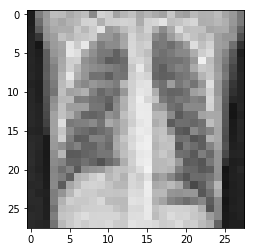

In [19]:
import matplotlib.pyplot as plt
plt.figure()

plt.imshow(images[1]) 
plt.show()

In [20]:
#autoencoder...
from keras.layers import Input , Dense
from keras.models import Model
import numpy as np 


In [21]:
## extra.. not needed.........
x_train = []
x = np.expand_dims(images, axis=0)
for i in range(0,640) : 
    ima = np.expand_dims(images[i], axis=0)
    x_train.append(ima)

    
x_test = []
for i in range(0,640) : 
    ima = np.expand_dims(noisy_images[i], axis=0)
    x_test.append(ima)    

In [22]:

train_images = []
test_images = []
noisy_train_images = []
noisy_test_images = []
for i in range(0,450) : 
    ima = np.expand_dims(images[i], axis=0)
    im = np.expand_dims(noisy_images[i], axis=0)
    train_images.append(ima)
    noisy_train_images.append(im)

for i in range(450,640) :
    ima = np.expand_dims(images[i], axis=0)
    im = np.expand_dims(noisy_images[i], axis=0)
    test_images.append(ima)
    noisy_test_images.append(im)

In [25]:
train_images = np.reshape(train_images , (len(train_images),643))
test_images = np.reshape(test_images , (len(test_images),28,28,3))
noisy_train_images = np.reshape(noisy_train_images , (len(noisy_train_images),28,28,3))
noisy_test_images = np.reshape(noisy_test_images , (len(noisy_test_images),28,28,3))

train_images= train_images.astype('float') / 255
test_images= test_images.astype('float') / 255
noisy_train_images= noisy_train_images.astype('float') / 255
noisy_test_images= noisy_test_images.astype('float') / 255


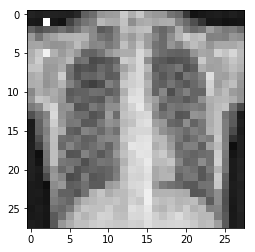

In [26]:
import matplotlib.pyplot as plt
plt.figure()

plt.imshow(train_images[2]) 
plt.show()

In [27]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# The encoding process
input_img = Input(shape=(64, 64, 3))  

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Note:
# padding is a hyper-parameter for either 'valid' or 'same'. 
# "valid" means "no padding". 
# "same" results in padding the input such that the output has the same length as the original input.

In [28]:
############
# Decoding #
############

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [29]:
# Declare the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [30]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0     

In [31]:
autoencoder.fit(noisy_train_images, train_images,
                epochs=100,
                batch_size  = 17,
                validation_data=(noisy_test_images, test_images) ,
                shuffle=True,
                
               )

ValueError: Error when checking input: expected input_1 to have shape (64, 64, 3) but got array with shape (28, 28, 3)

In [497]:
ima = np.expand_dims(noisy_train_images[12], axis=0)

ima

array([[[[0.06470588, 0.06470588, 0.06470588],
         [0.06078431, 0.06078431, 0.06078431],
         [0.06470588, 0.06470588, 0.06470588],
         ...,
         [0.07647059, 0.07647059, 0.07647059],
         [0.07647059, 0.07647059, 0.07647059],
         [0.08039216, 0.08039216, 0.08039216]],

        [[0.06862745, 0.06862745, 0.06862745],
         [0.05686275, 0.05686275, 0.05686275],
         [0.04117647, 0.04117647, 0.04117647],
         ...,
         [0.04901961, 0.04901961, 0.04901961],
         [0.07647059, 0.07647059, 0.07647059],
         [0.09215686, 0.09215686, 0.09215686]],

        [[0.06078431, 0.06078431, 0.06078431],
         [0.01764706, 0.01764706, 0.01764706],
         [0.26470588, 0.26470588, 0.26470588],
         ...,
         [0.25294118, 0.25294118, 0.25294118],
         [0.02941176, 0.02941176, 0.02941176],
         [0.08823529, 0.08823529, 0.08823529]],

        ...,

        [[0.05294118, 0.05294118, 0.05294118],
         [0.07254902, 0.07254902, 0.07254902]

In [468]:
ima.shape

(1, 28, 28, 3)

In [498]:
value = autoencoder.predict(ima)
value = value*255
#value = value.shape[:-1]
value = np.squeeze(value, axis = 0)
value = value.astype('float') / 255
value

array([[[0.16906352, 0.15891733, 0.16926005],
        [0.20159864, 0.22021529, 0.20795602],
        [0.23084205, 0.23717478, 0.22568086],
        ...,
        [0.2399496 , 0.23217889, 0.22012347],
        [0.17740324, 0.17380527, 0.17611932],
        [0.16240222, 0.15532897, 0.15155423]],

       [[0.12045655, 0.13007165, 0.11551056],
        [0.1968028 , 0.206466  , 0.21391669],
        [0.22767621, 0.25135037, 0.24097833],
        ...,
        [0.25140964, 0.26072492, 0.24761724],
        [0.17828468, 0.17642251, 0.16963591],
        [0.14558469, 0.15567575, 0.16522443]],

       [[0.15310813, 0.16155225, 0.1450322 ],
        [0.2380452 , 0.2464358 , 0.25437969],
        [0.26718573, 0.28306762, 0.27415768],
        ...,
        [0.39135608, 0.43360904, 0.42714628],
        [0.27964247, 0.31604845, 0.32026125],
        [0.23783403, 0.26649592, 0.28410507]],

       ...,

       [[0.0110887 , 0.0122773 , 0.0128554 ],
        [0.02094258, 0.02084069, 0.02017956],
        [0.09574249, 0

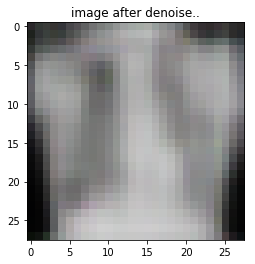

In [503]:

import matplotlib.pyplot as plt
plt.figure()
plt.title('image after denoise..')
plt.imshow(value) 
plt.show()

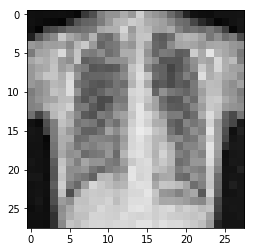

In [500]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('image after noising..')
ima = np.squeeze(ima, axis = 0)
plt.imshow(ima) 
plt.show()

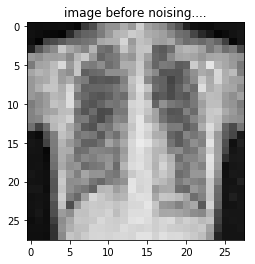

In [504]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('image before noising....')
#ima = np.squeeze(ima, axis = 0)
plt.imshow(train_images[12]) 
plt.show()

In [399]:
#not needed........
v= np.reshape(images , (len(images),28,28,3))
v.shape

(524, 28, 28, 3)

In [400]:
#..........
v= v.astype('float') / 255
v

array([[[[0.1254902 , 0.1254902 , 0.1254902 ],
         [0.10588235, 0.10588235, 0.10588235],
         [0.10980392, 0.10980392, 0.10980392],
         ...,
         [0.10980392, 0.10980392, 0.10980392],
         [0.11764706, 0.11764706, 0.11764706],
         [0.12941176, 0.12941176, 0.12941176]],

        [[0.11764706, 0.11764706, 0.11764706],
         [0.10196078, 0.10196078, 0.10196078],
         [0.09019608, 0.09019608, 0.09019608],
         ...,
         [0.10196078, 0.10196078, 0.10196078],
         [0.10980392, 0.10980392, 0.10980392],
         [0.1254902 , 0.1254902 , 0.1254902 ]],

        [[0.11372549, 0.11372549, 0.11372549],
         [0.09411765, 0.09411765, 0.09411765],
         [0.07058824, 0.07058824, 0.07058824],
         ...,
         [0.06666667, 0.06666667, 0.06666667],
         [0.07843137, 0.07843137, 0.07843137],
         [0.10588235, 0.10588235, 0.10588235]],

        ...,

        [[0.11372549, 0.11372549, 0.11372549],
         [0.10980392, 0.10980392, 0.10980392]

In [514]:
cv2.imwrite("noise_denoise\\imm.jpg",ima)

True

In [516]:
autoencoder.save('noise_denoise\\denoisy.h5')

In [519]:
autoencoder.save('noise_denoise\\denoisy.json')